# Testing the CosmoAPI SACC Generation Developement

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from firecrown.metadata_types import Galaxies, InferredGalaxyZDist, TwoPointHarmonic, TwoPointXY
from firecrown.generators.inferred_galaxy_zdist import ZDistLSSTSRDBin, LinearGrid1D
from firecrown.utils import base_model_to_yaml, base_model_from_yaml
from firecrown.metadata_functions import make_all_photoz_bin_combinations, TwoPointHarmonic, TwoPointReal
import firecrown.likelihood.two_point as tp
from firecrown.modeling_tools import ModelingTools
from firecrown.ccl_factory import CCLFactory
from firecrown.updatable import get_default_params
from firecrown.parameters import ParamsMap
import firecrown

import sacc
import datetime
import numpy as np
import matplotlib.pyplot as plt

# this is only needed for now:
import CosmoAPI
from CosmoAPI.two_pt_func import generate_theory, nz_loader, tracer_tools
from CosmoAPI.api_io import load_yaml_file
from CosmoAPI.not_implemented import not_implemented_message
from CosmoAPI.firecrown_tools import load_systematics_factory, build_modeling_tools
from CosmoAPI.firecrown_tools import update_missing_keys, extract_per_bin_systematics
from CosmoAPI.firecrown_tools import build_firecrown_params_map_and_tools

In [2]:
config = load_yaml_file('../test.yaml')

In [3]:
config["general"]

{'run_name': 'test',
 'output_dir': './dev/',
 'extra_sacc_metadata': 'You can add anything you want here :) ',
 'config_file': '../test.yaml'}

# Generate Theory Vector for SACC
All of this runs inside of this prepare function below

In [15]:
# generates the tomographic bins
tomoz_bins = nz_loader.load_all_redshift_distr(config)

# generates the two-point functions metadatas
all_2pt_func, all_2pt_metadata = generate_theory.prepare_2pt_functions(
    config,
    tomoz_bins
)

# build the firecrown parameter map and tools
firecrown_param_map, tools = build_firecrown_params_map_and_tools(
    config,
    all_2pt_func
)

sacc_test = generate_theory.construct_sacc(
    config,
    tomoz_bins,
    tools,
    all_2pt_func,
    all_2pt_metadata,
    firecrown_param_map
)

All nz_type probes have the same function: TwoPointHarmonic
All nz_type probes have the same function: TwoPointHarmonic
Loading systematics for probe source
Loading systematics for probe lens


In [16]:
sacc_test.metadata

{'time_created': '2025-01-16T15:48:20.897774',
 'info': 'Synthetic sacc constructed by CosmoAPI v0.1.0 by user loureiro',
 'run_name': 'test',
 'cosmoapi_config_file': '../test.yaml',
 'extra_metada': 'You can add anything you want here :) '}

or simply:

In [8]:
sacc_test2 = generate_theory.generate_sacc_theory_vector(config, save_sacc=True)

All nz_type probes have the same function: TwoPointHarmonic
All nz_type probes have the same function: TwoPointHarmonic
Loading systematics for probe source
Loading systematics for probe lens


INFO:CosmoAPI:Saving sacc file to: /Users/loureiro/Work/Github/CosmoAPI/notebooks/dev/test.sacc


## Covariance mockup

In [12]:
import pandas as pd
two_point_pd_list = []
for two_point, meta in zip(all_two_point_functions, all_two_point_metdata):
    two_point_pd_list.append(
        pd.DataFrame(
            {
                "ell": two_point.ells,
                "Cell": np.abs(two_point.compute_theory_vector(tools)),
                "bin-x": meta.XY.x.bin_name,
                "bin-y": meta.XY.y.bin_name,
                "measurement": meta.get_sacc_name(),
            }
        )
    )

In [13]:
two_point_pd_list

[             ell          Cell     bin-x     bin-y         measurement
 0       2.000000  2.062488e-08  source_0  source_0  galaxy_shear_cl_ee
 1       2.111796  2.150840e-08  source_0  source_0  galaxy_shear_cl_ee
 2       2.229842  2.228341e-08  source_0  source_0  galaxy_shear_cl_ee
 3       2.354486  2.295176e-08  source_0  source_0  galaxy_shear_cl_ee
 4       2.486098  2.351573e-08  source_0  source_0  galaxy_shear_cl_ee
 ..           ...           ...       ...       ...                 ...
 123  1608.947253  2.188825e-11  source_0  source_0  galaxy_shear_cl_ee
 124  1698.884500  1.971539e-11  source_0  source_0  galaxy_shear_cl_ee
 125  1793.849076  1.773986e-11  source_0  source_0  galaxy_shear_cl_ee
 126  1894.122000  1.594651e-11  source_0  source_0  galaxy_shear_cl_ee
 127  2000.000000  1.432087e-11  source_0  source_0  galaxy_shear_cl_ee
 
 [128 rows x 5 columns],
              ell          Cell     bin-x     bin-y         measurement
 0       2.000000  2.918190e-08  sour

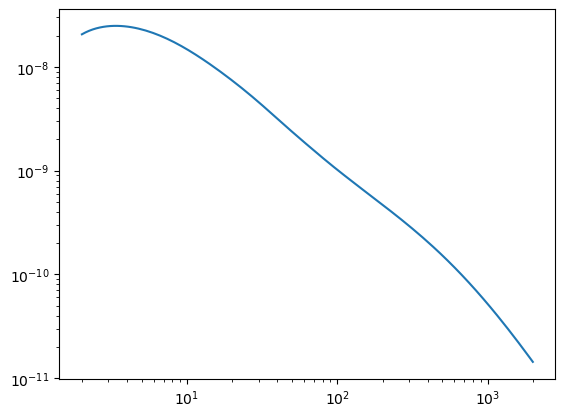

In [14]:
plt.loglog(ells, tv0)

In [15]:
ells

array([   2.        ,    2.11179639,    2.22984199,    2.35448614,
          2.48609766,    2.62506603,    2.77180248,    2.92674123,
          3.09034079,    3.26308526,    3.44548583,    3.63808227,
          3.8414445 ,    4.05617431,    4.28290713,    4.5223139 ,
          4.77510308,    5.04202273,    5.32386269,    5.621457  ,
          5.9356863 ,    6.26748045,    6.61782129,    6.98774555,
          7.37834791,    7.79078423,    8.22627501,    8.68610893,
          9.17164673,    9.68432522,   10.22566152,   10.79725753,
         11.40080474,   12.03808914,   12.71099658,   13.42151834,
         14.17175698,   14.96393261,   15.80038942,   16.68360267,
         17.61618593,   18.60089892,   19.64065558,   20.73853277,
         21.8977793 ,   23.12182563,   24.41429393,   25.77900888,
         27.22000893,   28.74155828,   30.3481595 ,   32.04456682,
         33.83580024,   35.72716038,   37.72424414,   39.83296128,
         42.05955189,   44.4106049 ,   46.89307753,   49.51431